In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import warnings
from sklearn.model_selection import train_test_split
import pickle
from MVDD.MVDD import MVDD
import MVDD.MVDD_Generator as mvGen

plt.rc('font', size=12)
warnings.filterwarnings('ignore')

# Hemo

In [2]:
#Load original dataframes
hemoData = pd.read_csv('Data/Preprocessed Data/Cluster_Hemo.csv', index_col='DEIDNUM')
allScores = hemoData['Score']
death = hemoData['ScoreDeath']
rehosp = hemoData['ScoreRehosp']
readm = hemoData['ScoreReadmission']
hemoData

RAP   PAS   PAD  PAMN  PCWP  PCWPMod  PCWPA  PCWPMN    CO    CI  \
DEIDNUM                                                                     
72       24.0  42.0  24.0  30.0  36.0     36.0   36.0    36.0  2.20  1.60   
72       18.0  42.0  24.0  30.0  24.0     24.0   24.0    28.0  3.10  2.00   
81       10.0  40.0  20.0  27.0  18.0     18.0   18.0    20.0  4.52  2.02   
81       12.0  35.0  15.0  25.0  17.0     17.0   17.0    14.0  4.65  2.08   
814       3.0  51.0  19.0  30.0  18.0     18.0   18.0    18.0  4.10  2.00   
...       ...   ...   ...   ...   ...      ...    ...     ...   ...   ...   
98508     NaN   NaN   NaN   NaN   NaN      NaN    NaN     NaN   NaN   NaN   
99302    19.0  87.0  37.0  54.0  44.0     44.0   44.0     NaN  3.90  2.00   
99302    11.0  70.0  28.0  44.0  28.0     28.0   28.0     NaN  5.30  2.70   
99935     8.0  49.0  29.0  31.0  15.0     15.0   15.0    26.0  4.00  2.40   
99935     8.0  52.0  24.0  39.0  24.0     24.0   24.0    24.0  5.60  3.30   

         ...      PAPP          SVR       RAT   PPRatio   Age   EjF  Score  \
DEIDNUM  ...                                                                 
72       ...  0.428571  5357.575758  0.666667  0.266667  88.0  25.0      5   
72       ...  0.428571  3509.677419  0.750000  0.272727  88.0  25.0      3   
81       ...  0.500000  1982.300885  0.555556  0.242857  69.0  20.0      1   
81       ...  0.571429  1772.043011  0.705882  0.571429  69.0  20.0      1   
814      ...  0.627451  2621.138211  0.166667  0.566667  58.0   NaN      3   
...      ...       ...          ...       ...       ...   ...   ...    ...   
98508    ...       NaN          NaN       NaN       NaN  57.0  30.0      4   
99302    ...  0.574713  2666.666667  0.431818  0.642857  41.0  15.0      5   
99302    ...  0.600000  2440.251572  0.392857  1.088608  41.0  15.0      3   
99935    ...  0.408163  3220.000000  0.533333  1.253333  64.0  20.0      3   
99935    ...  0.538462  1985.714286  0.333333  0.888889  64.0  20.0      3   

         ScoreDeath  ScoreRehosp  ScoreReadmission  
DEIDNUM                                             
72                5            5                 4  
72                3            4                 2  
81                2            1                 1  
81                2            1                 1  
814               3            4                 2  
...             ...          ...               ...  
98508             4            3                 5  
99302             5            5                 4  
99302             3            4                 2  
99935             3            4                 2  
99935             3            4                 2  

[418 rows x 31 columns]

In [3]:
# Preprocess and create training and testing sets
hemo = hemoData.drop('Score', axis=1)
hemo = hemo.drop('ScoreDeath', axis=1)
hemo = hemo.drop('ScoreRehosp', axis=1)
hemo = hemo.drop('ScoreReadmission', axis=1)
hemo = hemo.replace(np.inf, 0)
hemo = hemo.fillna(0)

xData = hemo
yData = allScores
xData.shape, yData.shape

((418, 27), (418,))

## All Scores Label

In [4]:
# #Perform Grid search to find best parameter set
# trialParams = {'criterion': ('gini', 'entropy'), 'max_depth': [3, 5, 7, 10, 13, 15, 20, 25, 30, None], 
#                'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]}

# mvGen.findBestModelParams(xData, yData, trialParams)

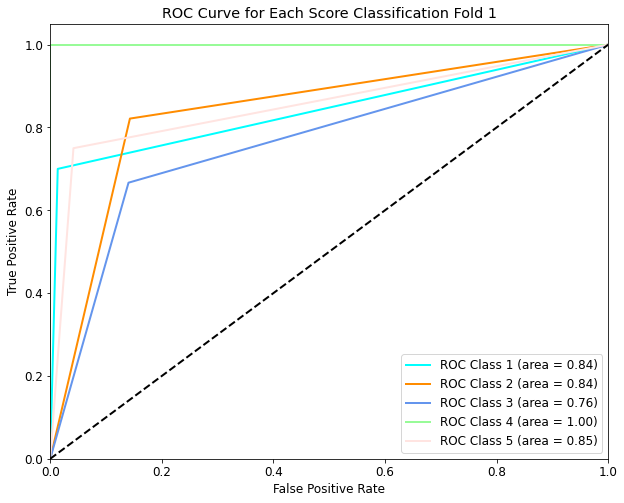

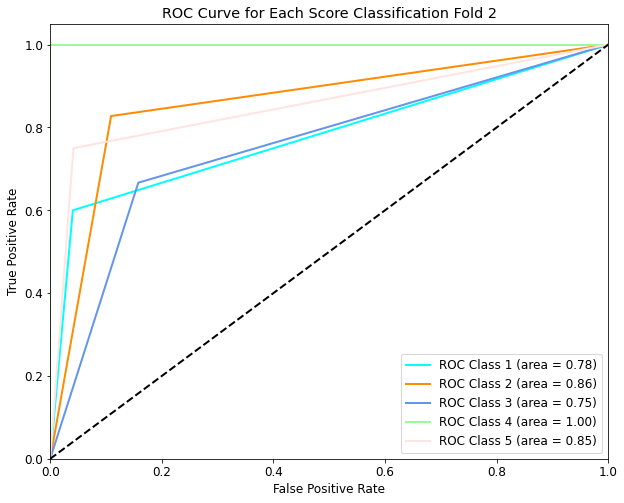

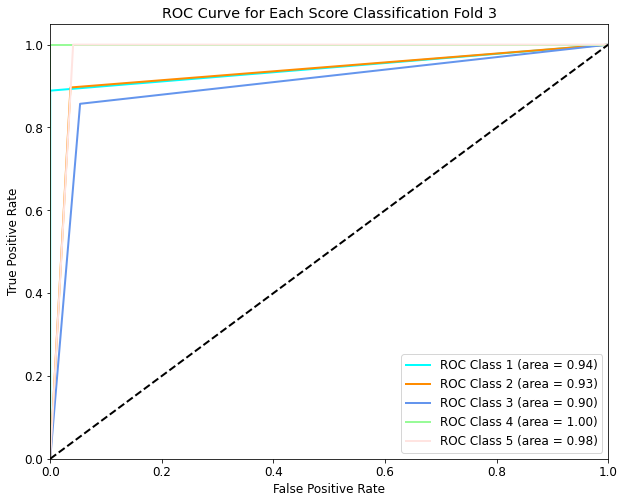

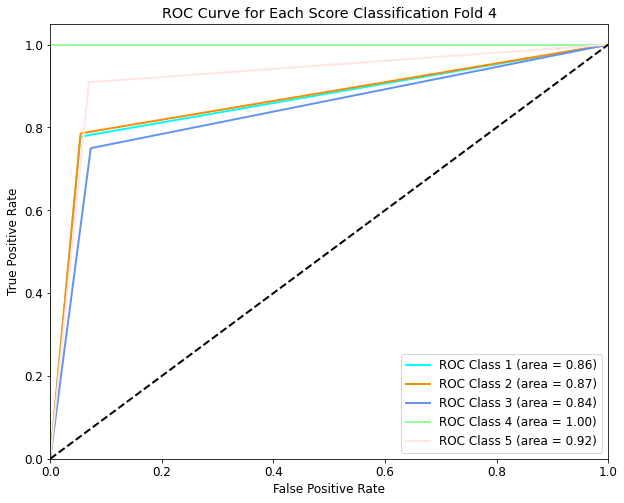

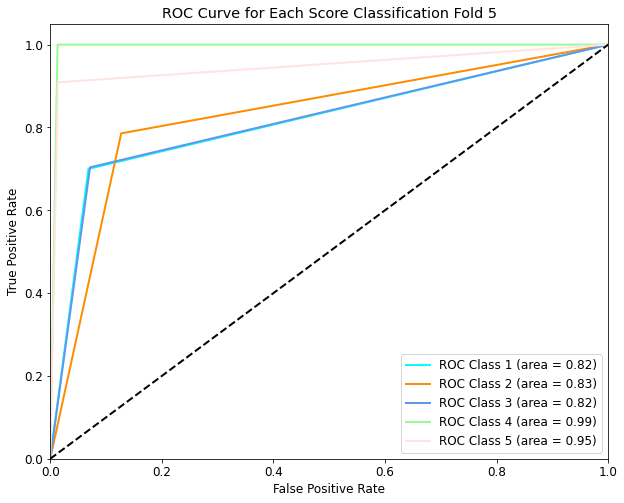

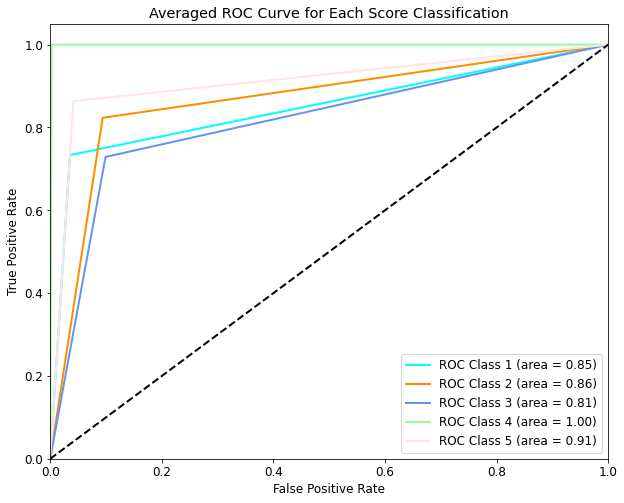

*****Averaged Final Classification Results*****
Accuracy: 0.801(+/- 0.110)
Precision: 0.807(+/- 0.115)
Recall: 0.801(+/- 0.110)
F1: 0.802(+/- 0.112)


In [5]:
mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='Hemo_AllOutcomes', numFolds=5, 
                                        showIndividualROC=True)

In [6]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

Feature Importance
PCWP               0.207000
HRTRT              0.159777
PCWPMod            0.131555
MPAP               0.100430
PAD                0.092914
CPI                0.080426
CO                 0.051413
MAP                0.035814
PCWPMN             0.034424
PCWPA              0.019353

## Death Label

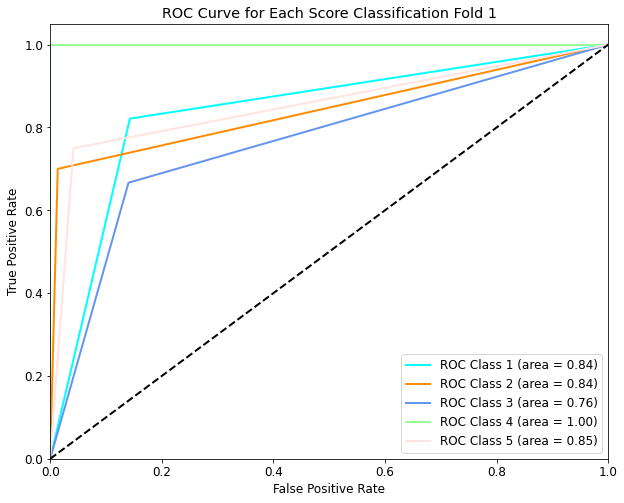

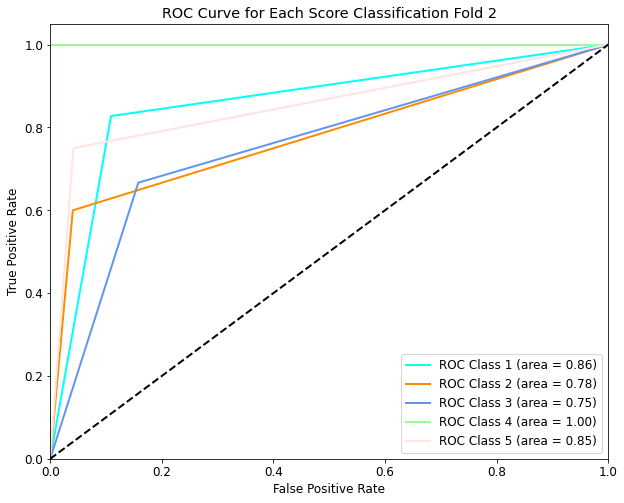

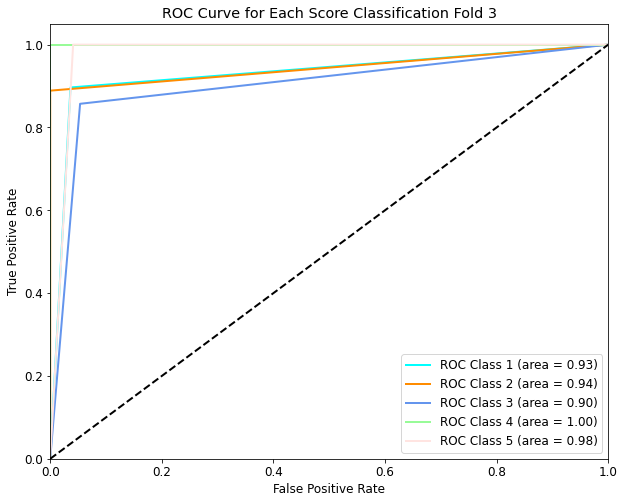

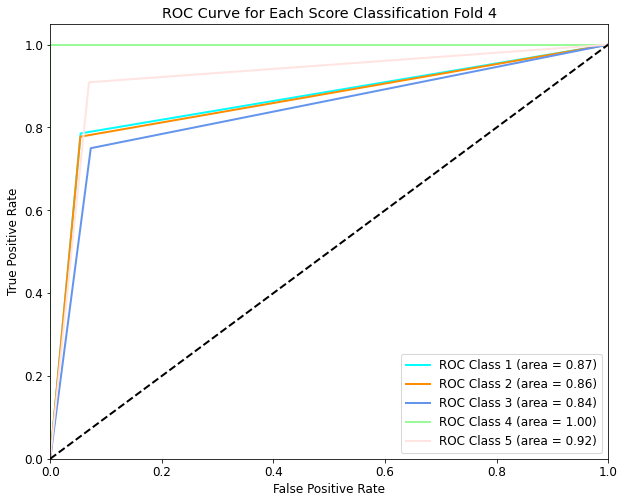

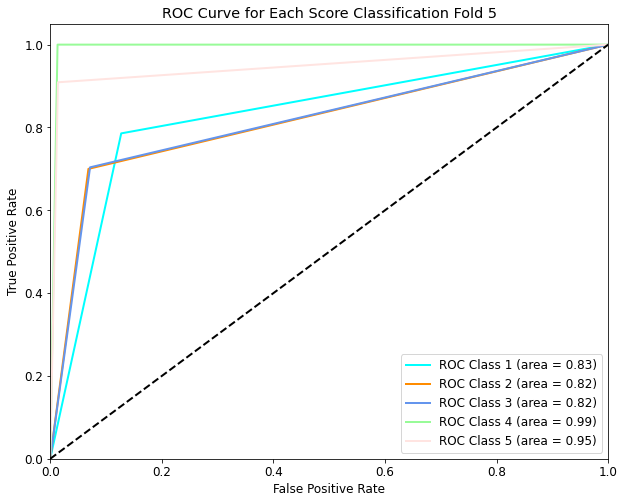

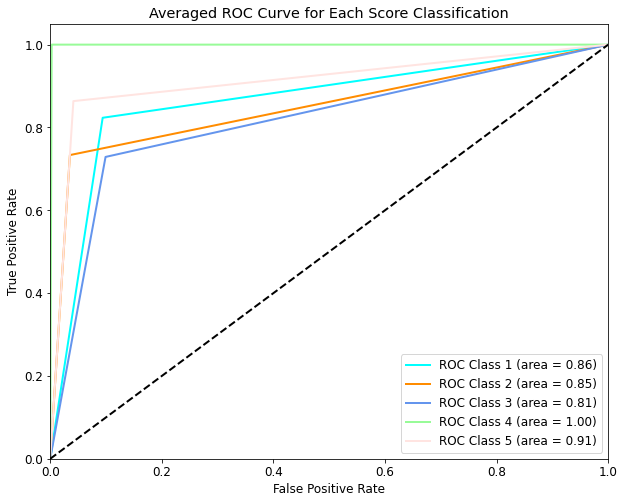

*****Averaged Final Classification Results*****
Accuracy: 0.801(+/- 0.110)
Precision: 0.807(+/- 0.115)
Recall: 0.801(+/- 0.110)
F1: 0.802(+/- 0.112)


In [7]:
yData = death

mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='Hemo_Death', numFolds=5, 
                                        showIndividualROC=True)

In [8]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

Feature Importance
PCWP               0.207000
HRTRT              0.159777
PCWPMod            0.131555
MPAP               0.100430
PAD                0.092914
CPI                0.080426
CO                 0.051413
MAP                0.035814
PCWPMN             0.034424
PCWPA              0.019353

## Rehospitalization Label

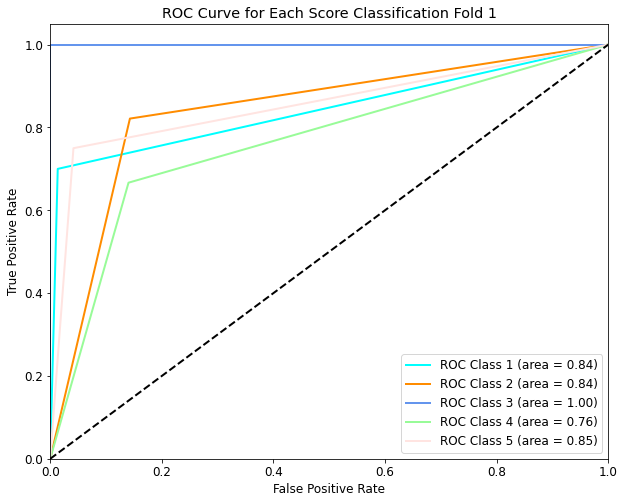

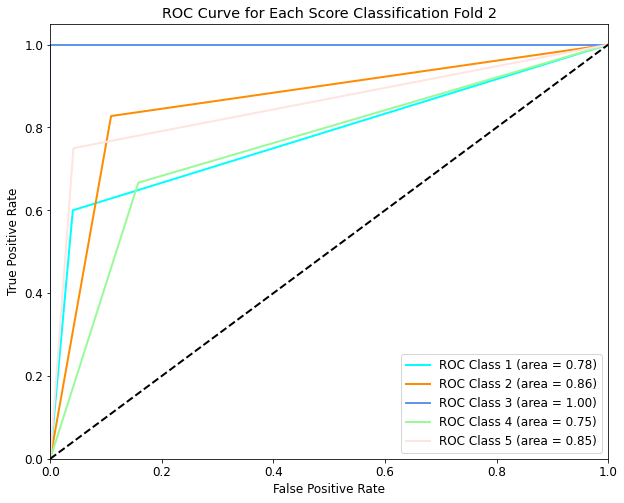

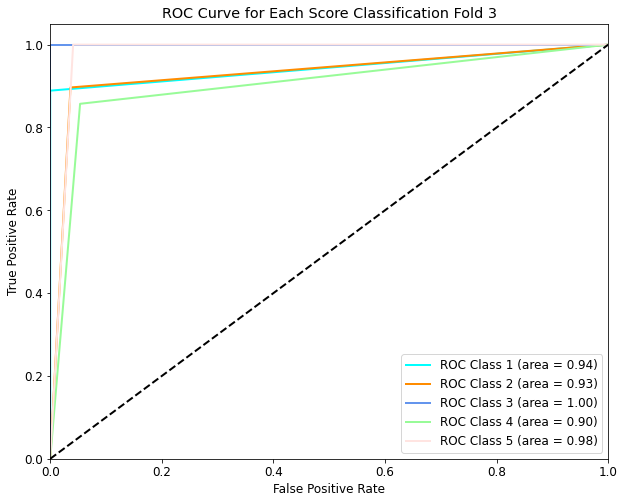

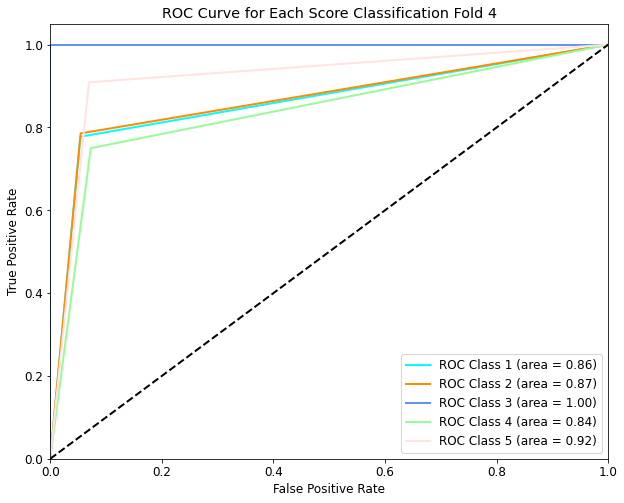

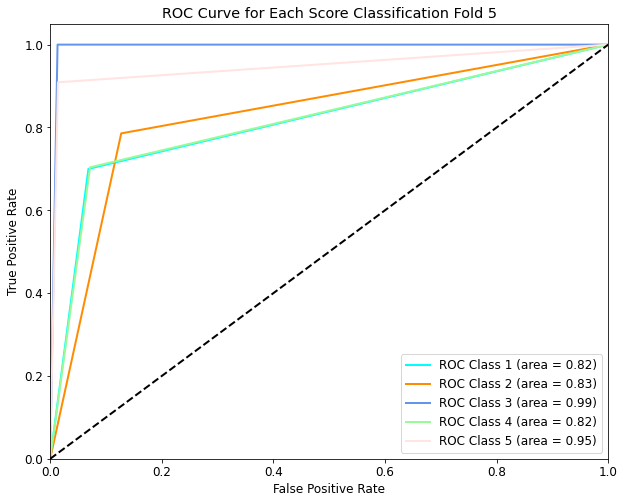

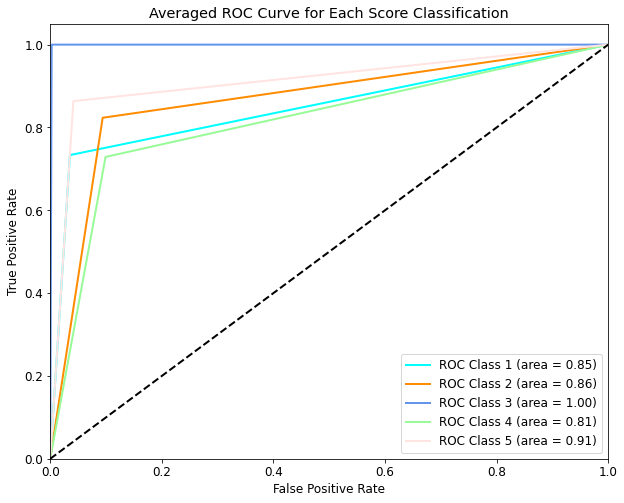

*****Averaged Final Classification Results*****
Accuracy: 0.801(+/- 0.110)
Precision: 0.807(+/- 0.115)
Recall: 0.801(+/- 0.110)
F1: 0.802(+/- 0.112)


In [9]:
yData = rehosp

mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='Hemo_Rehosp', numFolds=5, 
                                        showIndividualROC=True)

In [10]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

Feature Importance
PCWP               0.207000
HRTRT              0.159777
PCWPMod            0.131555
MPAP               0.100430
PAD                0.092914
CPI                0.080426
CO                 0.051413
MAP                0.035814
PCWPMN             0.034424
PCWPA              0.019353

## Readmission Label

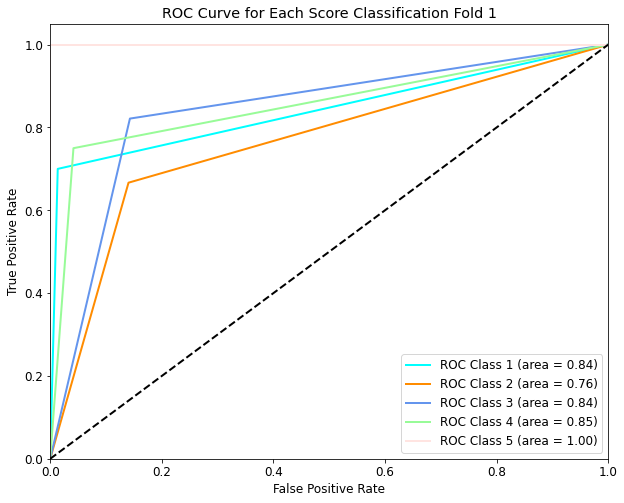

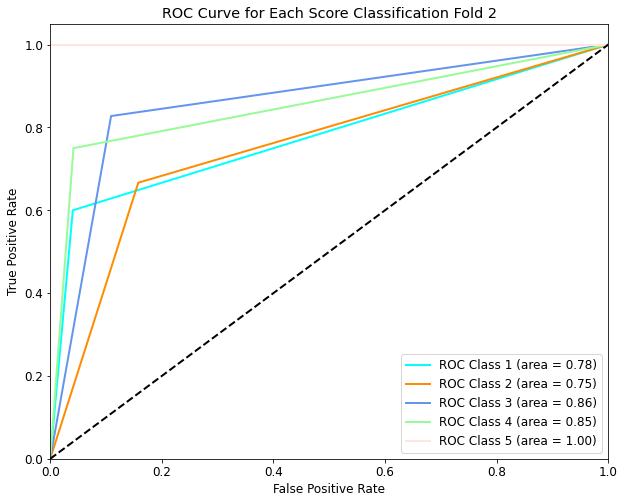

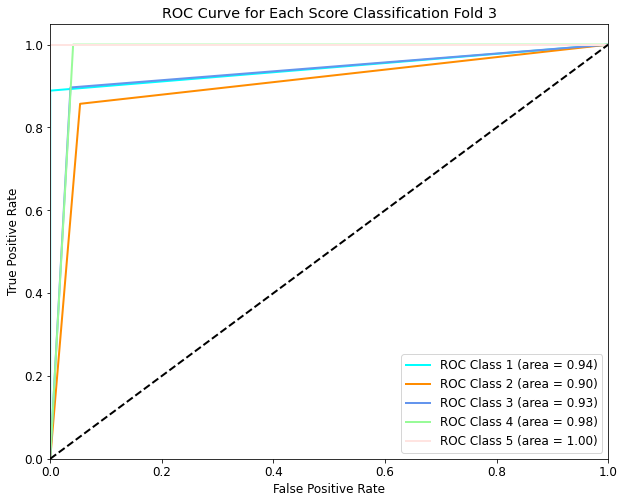

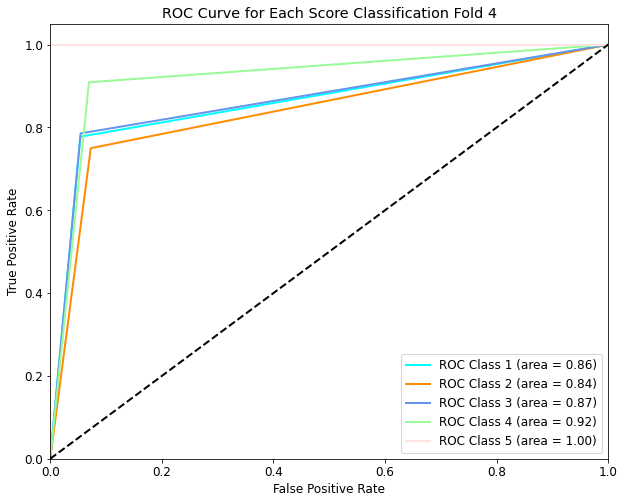

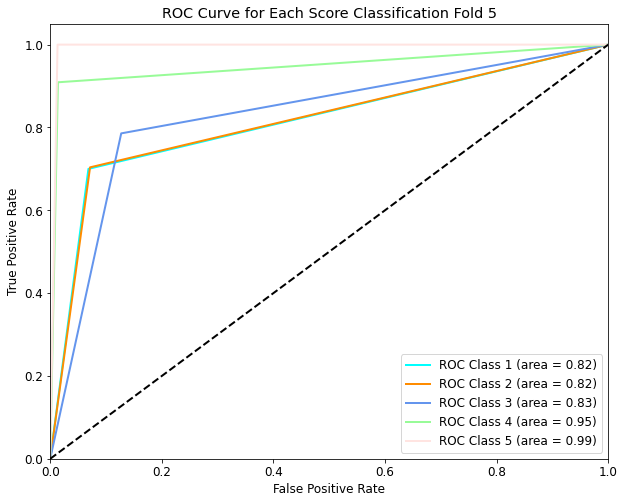

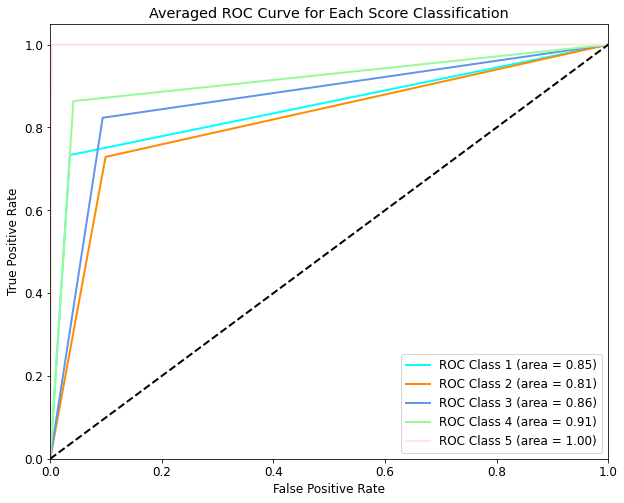

*****Averaged Final Classification Results*****
Accuracy: 0.801(+/- 0.110)
Precision: 0.807(+/- 0.115)
Recall: 0.801(+/- 0.110)
F1: 0.802(+/- 0.112)


In [11]:
yData = readm

mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='Hemo_Readmission', numFolds=5, 
                                        showIndividualROC=True)

In [12]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

Feature Importance
PCWP               0.207000
HRTRT              0.159777
PCWPMod            0.131555
MPAP               0.100430
PAD                0.092914
CPI                0.080426
CO                 0.051413
MAP                0.035814
PCWPMN             0.034424
PCWPA              0.019353

# All Data

In [13]:
#Load original dataframes
allDataOrig = pd.read_csv('Data/Preprocessed Data/Cluster_AllData.csv', index_col='DEIDNUM')
allScores = allDataOrig['Score']
death = allDataOrig['ScoreDeath']
rehosp = allDataOrig['ScoreRehosp']
readm = allDataOrig['ScoreReadmission']

allDataOrig

Age  Gender  Race          Wt        BMI  InitialHospDays  \
DEIDNUM                                                               
72       88.0     2.0   1.0   57.100000  26.424175              9.0   
72       88.0     2.0   1.0   52.000000  24.064047              9.0   
81       69.0     1.0   1.0  102.363636  32.307675              5.0   
81       69.0     1.0   1.0  100.454545  31.705134              5.0   
86       56.0     2.0   2.0   98.636364  40.016375              3.0   
...       ...     ...   ...         ...        ...              ...   
99302    41.0     1.0   2.0   97.400000  40.541103             21.0   
99912    46.0     1.0   1.0   78.636364  25.677180              2.0   
99912    46.0     1.0   1.0   78.200000  25.534694              2.0   
99935    64.0     2.0   1.0   77.700000  32.762692              3.0   
99935    64.0     2.0   1.0         NaN        NaN              3.0   

         TotalHospDays  NYHA  MLHFS   AF  ...     HR         PV         MAP  \
DEIDNUM                                   ...                                 
72                16.0   4.0   76.0  1.0  ...  104.0  12.452563  139.333333   
72                16.0   3.0   76.0  1.0  ...   92.0  12.452563  126.000000   
81                13.0   4.0   21.0  1.0  ...   70.0  -3.346568  125.333333   
81                13.0   2.0   21.0  1.0  ...   72.0  -3.346568  105.666667   
86                 3.0   4.0    NaN  0.0  ...   86.0   5.478621  146.666667   
...                ...   ...    ...  ...  ...    ...        ...         ...   
99302             21.0   NaN   79.0  0.0  ...   75.0  25.535155  130.000000   
99912              2.0   4.0   89.0  0.0  ...   67.0 -13.911732  174.666667   
99912              2.0   3.0   89.0  0.0  ...   60.0 -13.911732  140.666667   
99935             16.0   3.0  101.0  0.0  ...   86.0        NaN  135.333333   
99935             16.0   NaN  101.0  0.0  ...   87.0        NaN  153.333333   

           PP       PPP   PPRatio  Score  ScoreDeath  ScoreRehosp  \
DEIDNUM                                                             
72       26.0  0.276596  0.250000      4           4            4   
72       26.0  0.302326  0.282609      4           4            4   
81       32.0  0.363636  0.457143      5           5            5   
81       34.0  0.441558  0.472222      5           5            5   
86       30.0  0.300000  0.348837      2           2            2   
...       ...       ...       ...    ...         ...          ...   
99302    55.0  0.550000  0.733333      5           5            5   
99912    38.0  0.316667  0.567164      2           2            2   
99912    24.0  0.255319  0.400000      2           2            2   
99935    42.0  0.428571  0.488372      3           3            3   
99935    70.0  0.583333  0.804598      3           3            3   

         ScoreReadmission  
DEIDNUM                    
72                      4  
72                      4  
81                      5  
81                      5  
86                      1  
...                   ...  
99302                   5  
99912                   1  
99912                   1  
99935                   3  
99935                   3  

[866 rows x 122 columns]

In [14]:
# Preprocess and create training and testing sets
allData = allDataOrig.drop('Score', axis=1)
allData = allData.drop('ScoreDeath', axis=1)
allData = allData.drop('ScoreRehosp', axis=1)
allData = allData.drop('ScoreReadmission', axis=1)
allData = allData.replace(np.inf, 0)
allData = allData.fillna(0)

xData = allData
yData = allScores

## All Scores Label

In [15]:
#Perform Grid search to find best parameter set
trialParams = {'criterion': ('gini', 'entropy'), 'max_depth': [3, 5, 7, 10, 13, 15, 20, 25, 30, None], 
               'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]}

mvGen.findBestModelParams(xData, yData, trialParams)

Best parameters set found on training set:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3}
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       142
           2       0.99      1.00      0.99       253
           3       0.97      0.97      0.97       107
           4       1.00      0.99      0.99       203
           5       1.00      0.98      0.99       161

    accuracy                           0.99       866
   macro avg       0.99      0.99      0.99       866
weighted avg       0.99      0.99      0.99       866



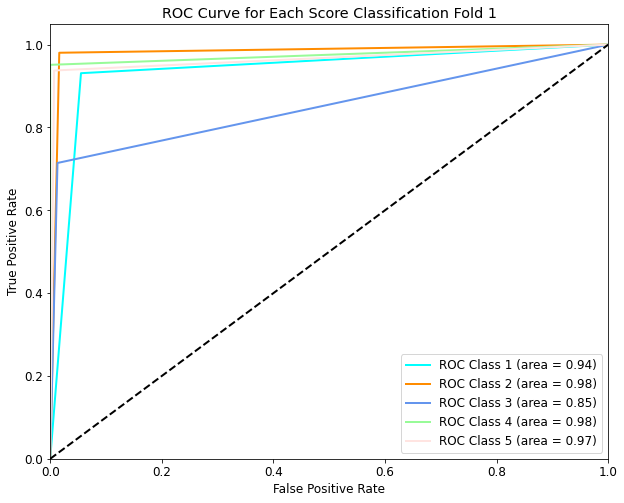

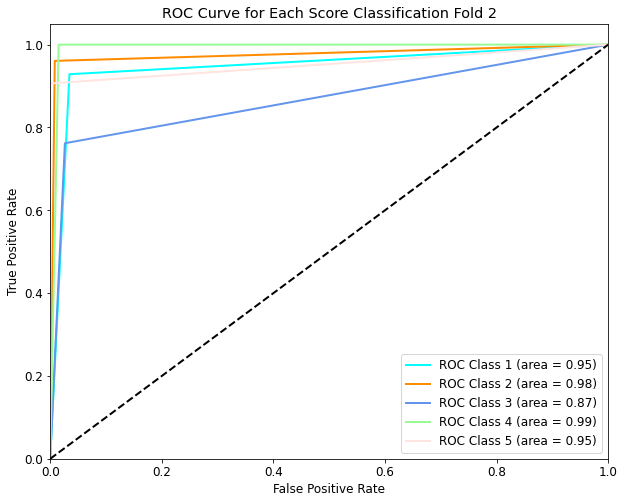

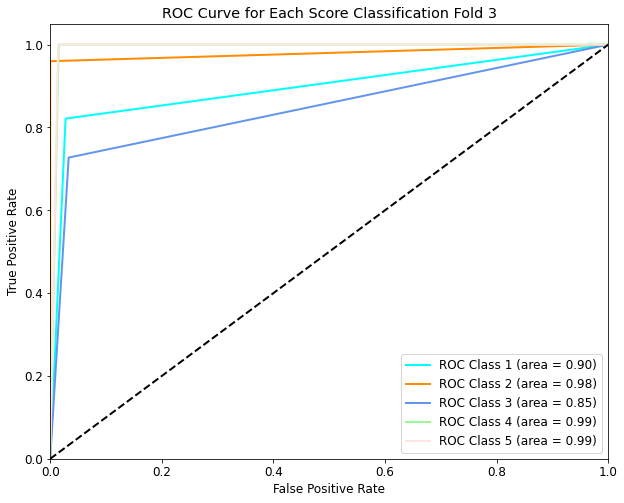

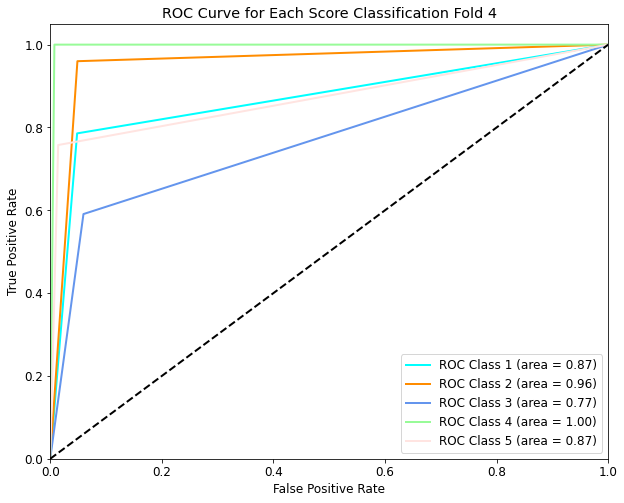

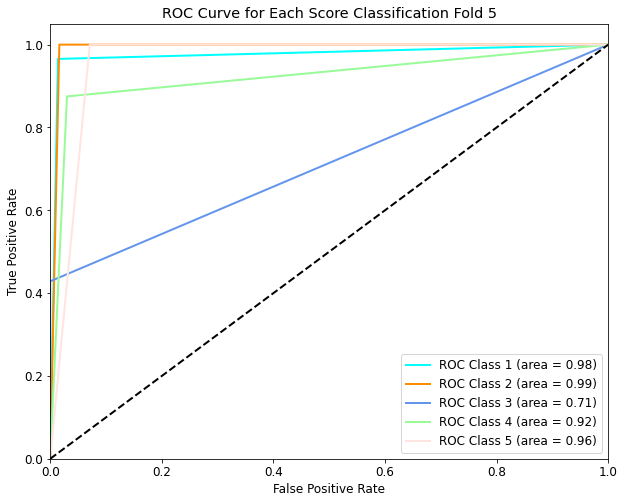

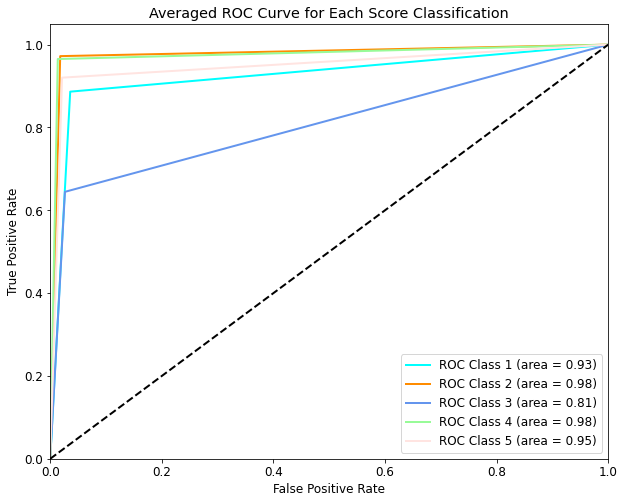

*****Averaged Final Classification Results*****
Accuracy: 0.906(+/- 0.056)
Precision: 0.911(+/- 0.056)
Recall: 0.906(+/- 0.056)
F1: 0.904(+/- 0.059)


In [16]:
mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='AllData_WConditions_AllOutcomes', numFolds=5, 
                                        showIndividualROC=True)

In [17]:
# Get Feature importance
featureDict = dict(zip(allData.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

Feature Importance
ISCHD              0.283875
ISCHEME            0.264209
ARRH               0.260694
PTCI               0.052790
DIAB               0.024277
Age                0.014098
MI                 0.013821
MLHFS              0.013122
PV                 0.011548
Wt                 0.008599

## Death Label

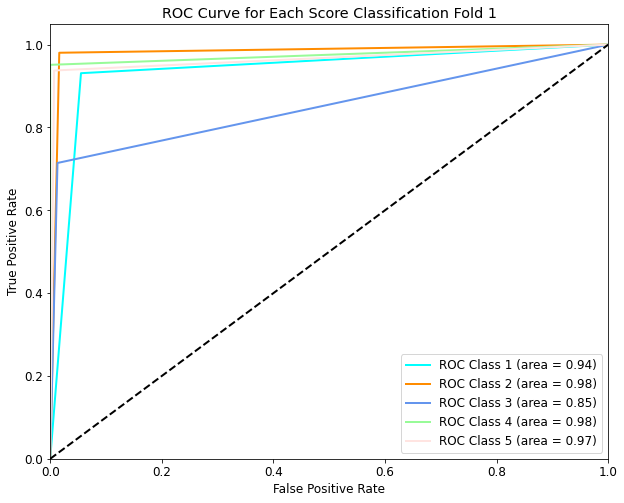

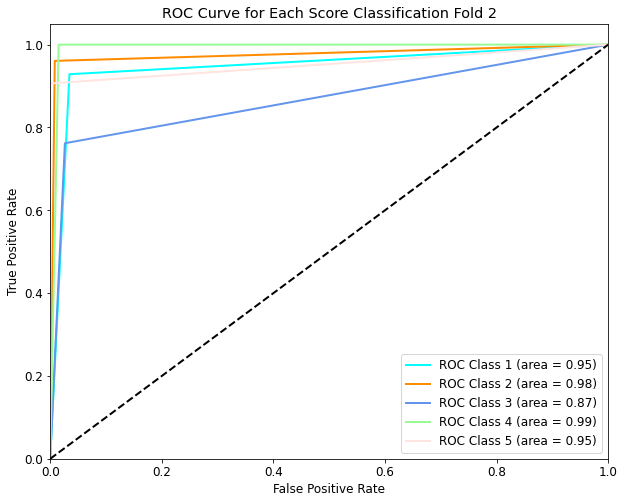

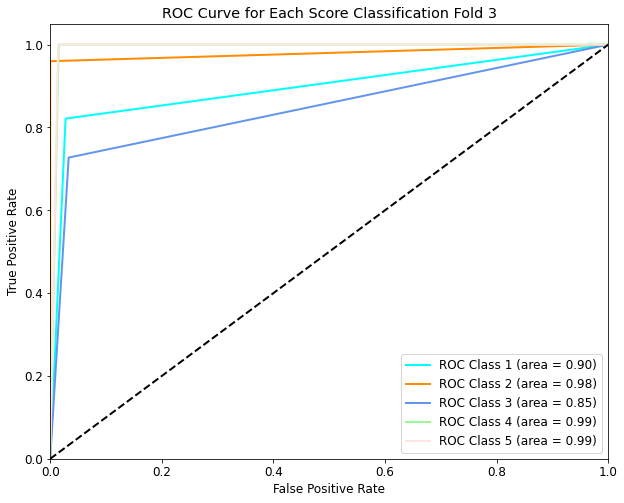

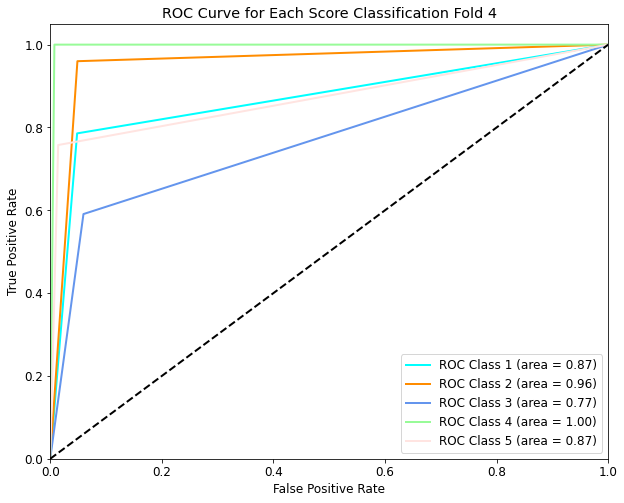

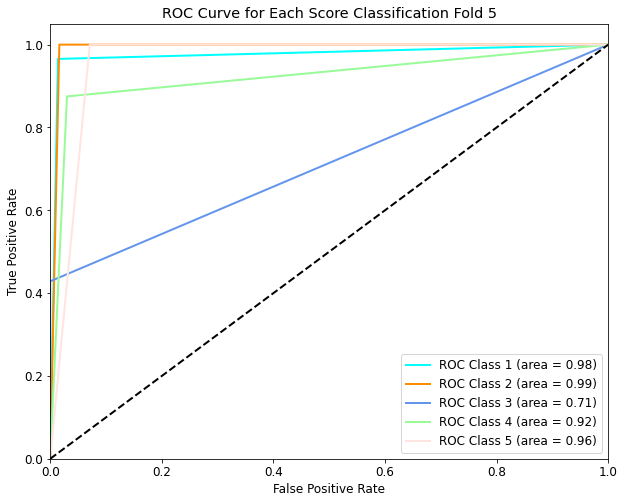

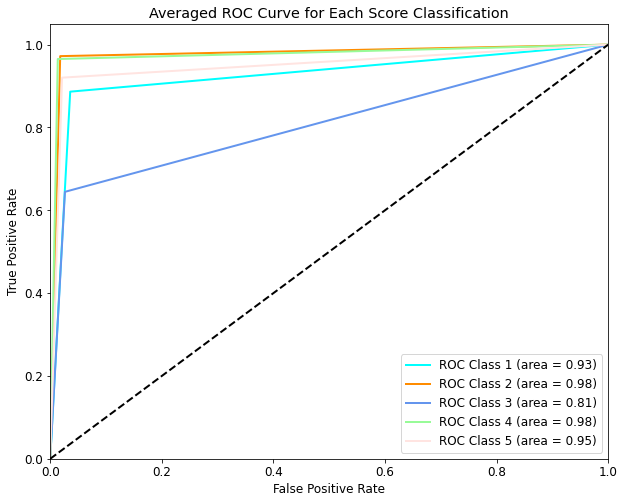

*****Averaged Final Classification Results*****
Accuracy: 0.906(+/- 0.056)
Precision: 0.911(+/- 0.056)
Recall: 0.906(+/- 0.056)
F1: 0.904(+/- 0.059)


In [18]:
yData = death

mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='AllData_WConditions_Death', numFolds=5, 
                                        showIndividualROC=True)

In [19]:
# Get Feature importance
featureDict = dict(zip(allData.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

Feature Importance
ISCHD              0.283875
ISCHEME            0.264209
ARRH               0.260694
PTCI               0.052790
DIAB               0.024277
Age                0.014098
MI                 0.013821
MLHFS              0.013122
PV                 0.011548
Wt                 0.008599

## Rehospitalization Label

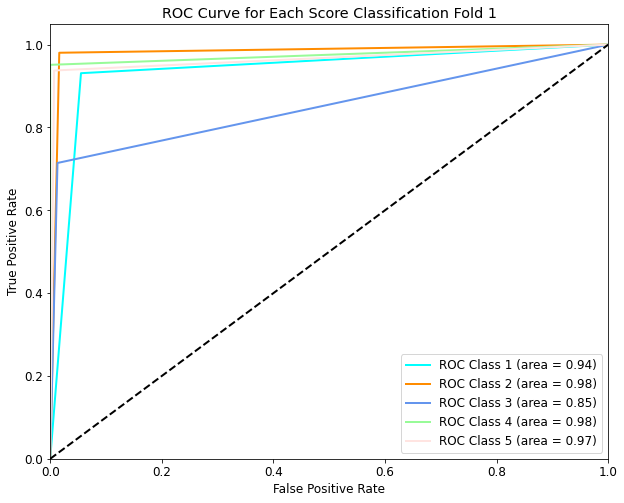

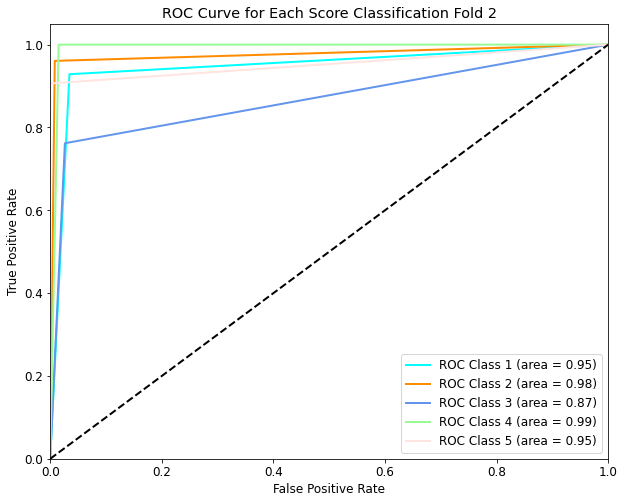

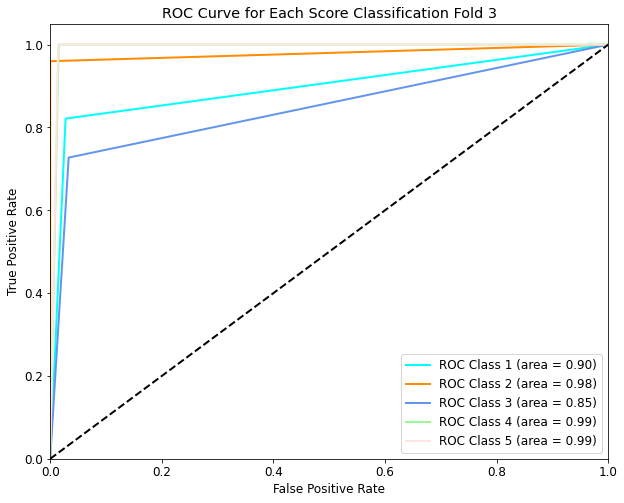

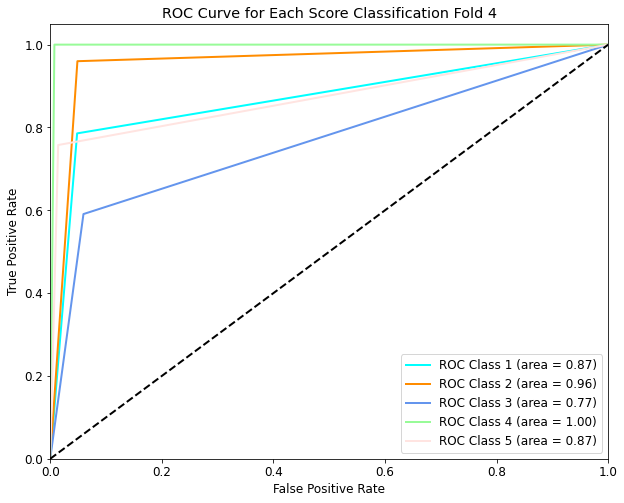

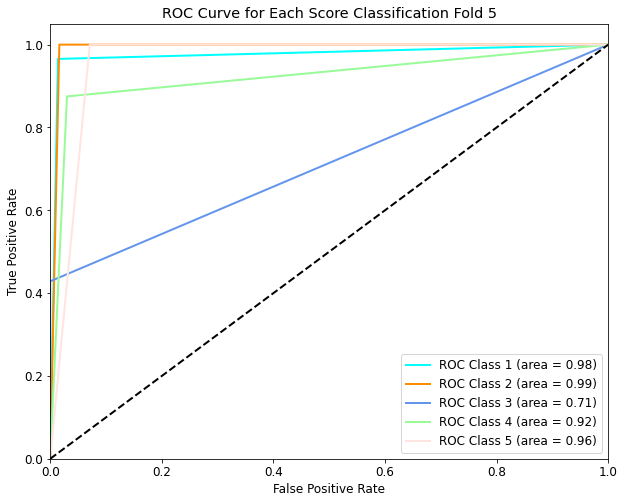

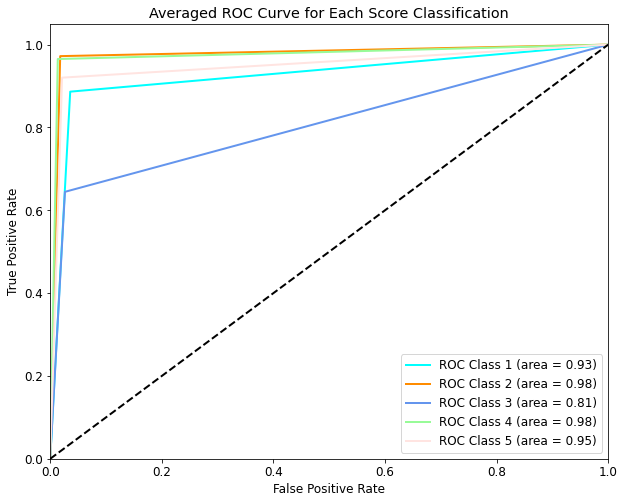

*****Averaged Final Classification Results*****
Accuracy: 0.906(+/- 0.056)
Precision: 0.911(+/- 0.056)
Recall: 0.906(+/- 0.056)
F1: 0.904(+/- 0.059)


In [20]:
yData = rehosp

mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='AllData_WConditions_Rehosp', numFolds=5, 
                                        showIndividualROC=True)

In [21]:
# Get Feature importance
featureDict = dict(zip(allData.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

Feature Importance
ISCHD              0.283875
ISCHEME            0.264209
ARRH               0.260694
PTCI               0.052790
DIAB               0.024277
Age                0.014098
MI                 0.013821
MLHFS              0.013122
PV                 0.011548
Wt                 0.008599

## Readmission Label

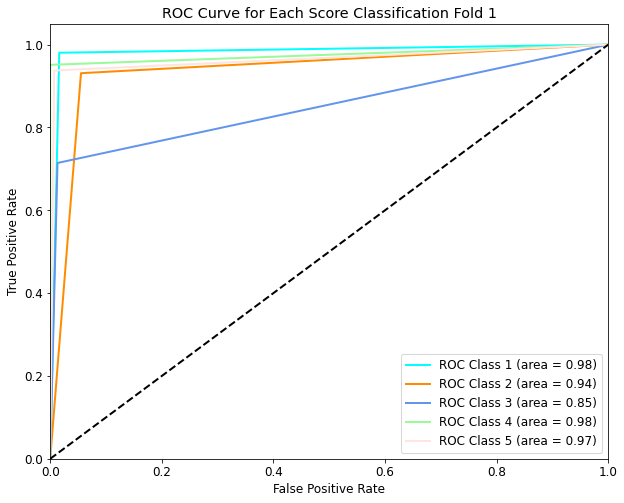

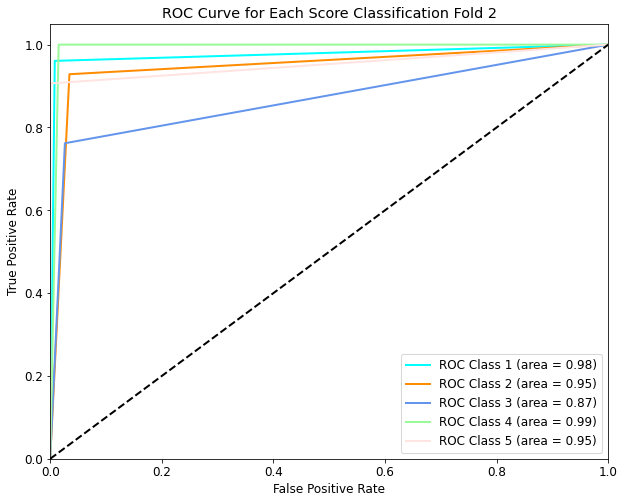

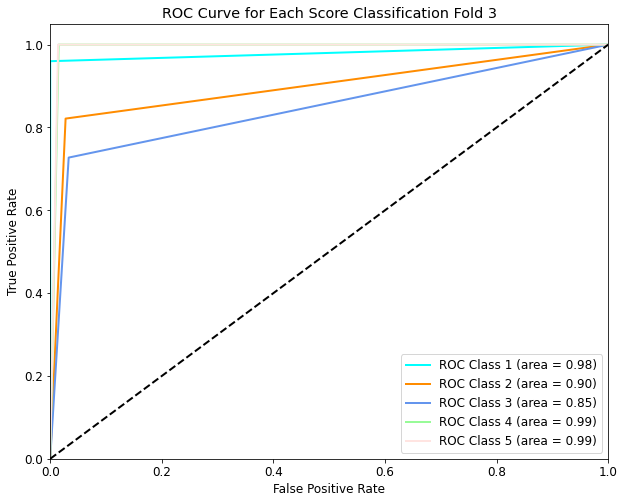

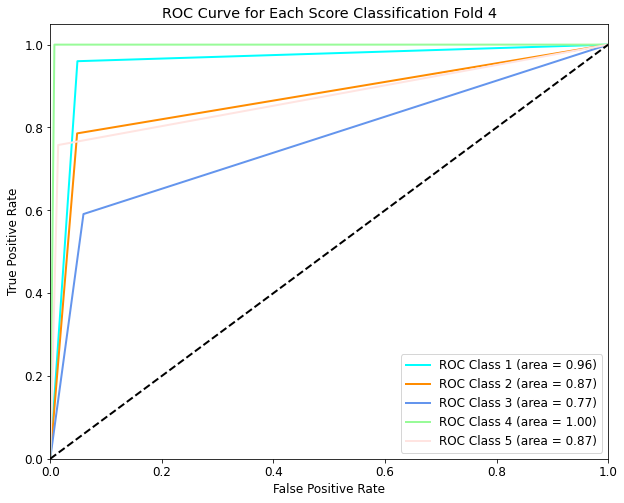

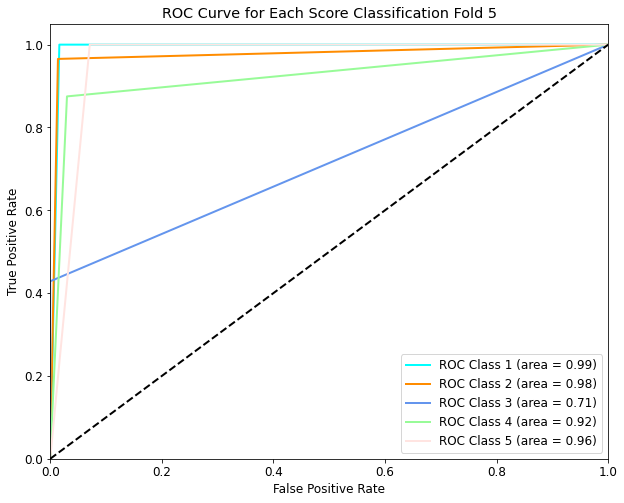

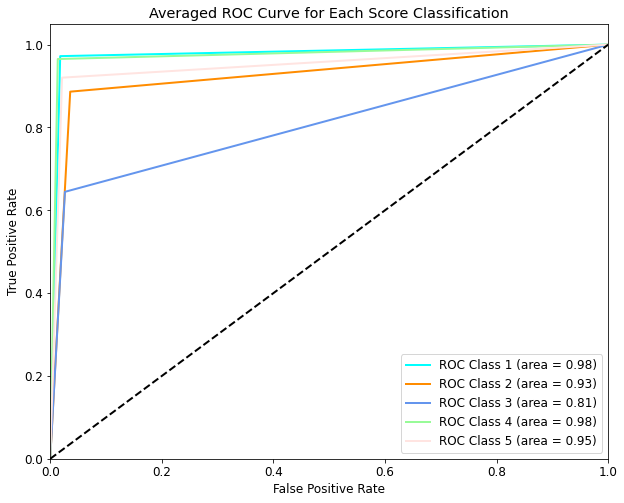

*****Averaged Final Classification Results*****
Accuracy: 0.906(+/- 0.056)
Precision: 0.911(+/- 0.056)
Recall: 0.906(+/- 0.056)
F1: 0.904(+/- 0.059)


In [22]:
yData = readm

mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='AllData_WConditions_Readmission', numFolds=5, 
                                        showIndividualROC=True)

In [23]:
# Get Feature importance
featureDict = dict(zip(allData.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

Feature Importance
ISCHD              0.283875
ISCHEME            0.264209
ARRH               0.260694
PTCI               0.052790
DIAB               0.024277
Age                0.014098
MI                 0.013821
MLHFS              0.013122
PV                 0.011548
Wt                 0.008599

# All Data without condition features

In [24]:
# Remove condition columns
remCols= [ 'AlchE', 'ANGP', 'AOREG', 'AOST', 'CABG', 'CARREST', 'COPD', 'CVD', 'CYTOE', 'DEPR', 'DIAB', 
          'FAMILE', 'GOUT', 'HEPT', 'HTN', 'HTRANS', 'ICD',  'ISCHD', 'ISCHEME', 'MALIG', 
          'MTST', 'OTHUNE', 'PACE', 'PERIPAE', 'PMRG', 'PTCI', 'PTREG', 'PVD', 'RENALI', 'SMOKING', 'STERD', 'STROKE',
          'SVT', 'TDP', 'TIA', 'VAHD', 'VALVUE', 'VF', 'ANGIO', 'AMR', 'ATE', 'BEN', 'BIS', 'BUM', 'CAND', 'CAP', 
          'CAR', 'DIGX', 'DIN', 'DOB', 'DOP', 'ENA', 'ETH', 'FOS', 'FUR', 'LIS', 'LOSA', 'MET', 'MIL', 'MON', 'NAT',
          'NIG', 'NIP', 'OTHAA', 'OTHA', 'OTHB', 'OTHD', 'PRO', 'QUI', 'RAM', 'TOP', 'TOR', 'TRA', 'VALSA']

for r in remCols: 
    allData = allData.drop(r, axis=1)


xData = allData
yData = allScores

xData

Age  Gender  Race          Wt        BMI  InitialHospDays  \
DEIDNUM                                                               
72       88.0     2.0   1.0   57.100000  26.424175              9.0   
72       88.0     2.0   1.0   52.000000  24.064047              9.0   
81       69.0     1.0   1.0  102.363636  32.307675              5.0   
81       69.0     1.0   1.0  100.454545  31.705134              5.0   
86       56.0     2.0   2.0   98.636364  40.016375              3.0   
...       ...     ...   ...         ...        ...              ...   
99302    41.0     1.0   2.0   97.400000  40.541103             21.0   
99912    46.0     1.0   1.0   78.636364  25.677180              2.0   
99912    46.0     1.0   1.0   78.200000  25.534694              2.0   
99935    64.0     2.0   1.0   77.700000  32.762692              3.0   
99935    64.0     2.0   1.0    0.000000   0.000000              3.0   

         TotalHospDays  NYHA  MLHFS   AF  ...  DIUR   EjF  BPDIAS  BPSYS  \
DEIDNUM                                   ...                              
72                16.0   4.0   76.0  1.0  ...   1.0  25.0    68.0   94.0   
72                16.0   3.0   76.0  1.0  ...   1.0  25.0    60.0   86.0   
81                13.0   4.0   21.0  1.0  ...   1.0  20.0    56.0   88.0   
81                13.0   2.0   21.0  1.0  ...   1.0  20.0    43.0   77.0   
86                 3.0   4.0    0.0  0.0  ...   1.0  25.0    70.0  100.0   
...                ...   ...    ...  ...  ...   ...   ...     ...    ...   
99302             21.0   0.0   79.0  0.0  ...   1.0  15.0    45.0  100.0   
99912              2.0   4.0   89.0  0.0  ...   1.0  24.0    82.0  120.0   
99912              2.0   3.0   89.0  0.0  ...   1.0  24.0    70.0   94.0   
99935             16.0   3.0  101.0  0.0  ...   1.0  20.0    56.0   98.0   
99935             16.0   0.0  101.0  0.0  ...   1.0  20.0    50.0  120.0   

            HR         PV         MAP    PP       PPP   PPRatio  
DEIDNUM                                                          
72       104.0  12.452563  139.333333  26.0  0.276596  0.250000  
72        92.0  12.452563  126.000000  26.0  0.302326  0.282609  
81        70.0  -3.346568  125.333333  32.0  0.363636  0.457143  
81        72.0  -3.346568  105.666667  34.0  0.441558  0.472222  
86        86.0   5.478621  146.666667  30.0  0.300000  0.348837  
...        ...        ...         ...   ...       ...       ...  
99302     75.0  25.535155  130.000000  55.0  0.550000  0.733333  
99912     67.0 -13.911732  174.666667  38.0  0.316667  0.567164  
99912     60.0 -13.911732  140.666667  24.0  0.255319  0.400000  
99935     86.0   0.000000  135.333333  42.0  0.428571  0.488372  
99935     87.0   0.000000  153.333333  70.0  0.583333  0.804598  

[866 rows x 44 columns]

## All Scores Label

In [25]:
#Perform Grid search to find best parameter set
trialParams = {'criterion': ('gini', 'entropy'), 'max_depth': [3, 5, 7, 10, 13, 15, 20, 25, 30, None], 
               'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]}

mvGen.findBestModelParams(xData, yData, trialParams)

Best parameters set found on training set:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 30}
              precision    recall  f1-score   support

           1       0.74      0.96      0.83       142
           2       0.80      0.98      0.88       253
           3       0.00      0.00      0.00       107
           4       0.92      0.88      0.90       203
           5       0.82      0.91      0.86       161

    accuracy                           0.82       866
   macro avg       0.66      0.75      0.70       866
weighted avg       0.72      0.82      0.77       866



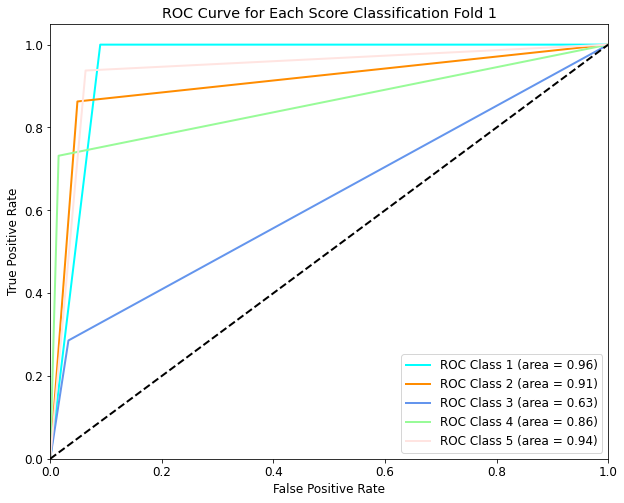

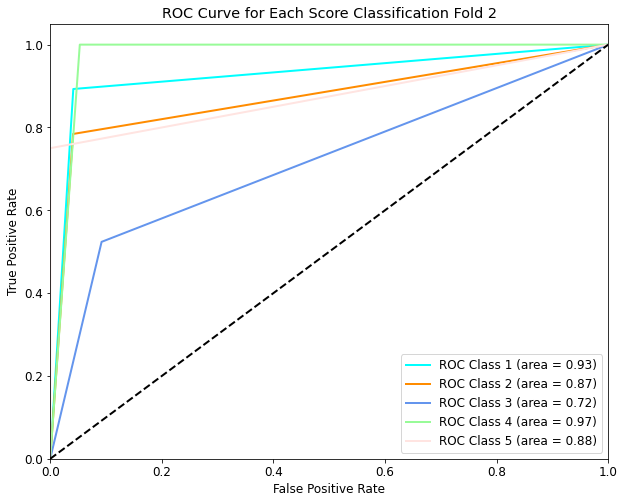

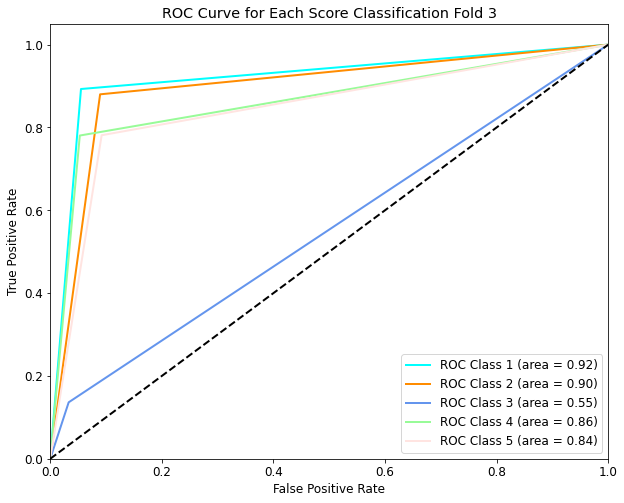

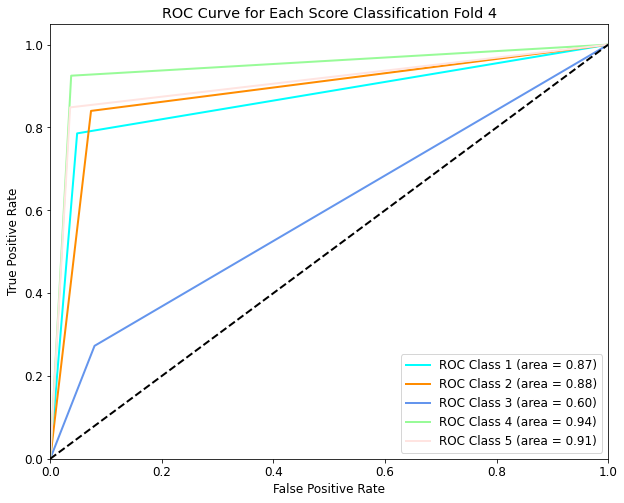

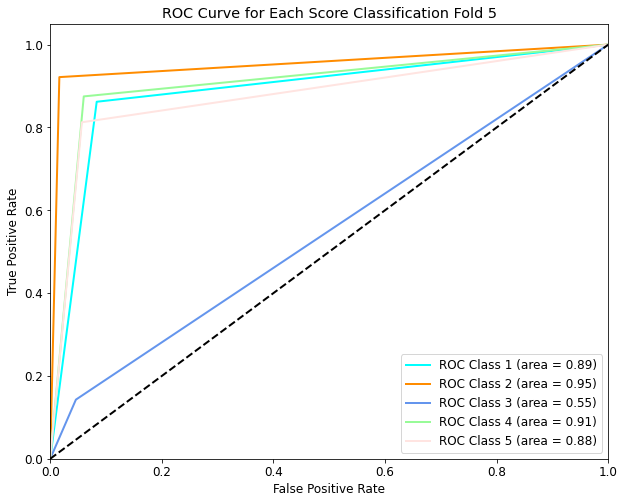

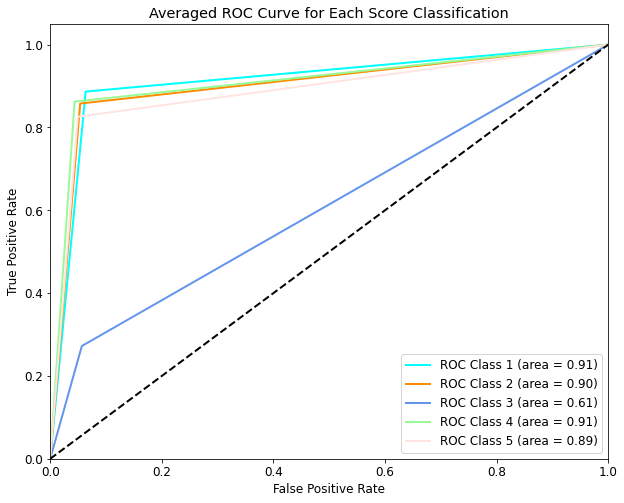

*****Averaged Final Classification Results*****
Accuracy: 0.785(+/- 0.046)
Precision: 0.777(+/- 0.078)
Recall: 0.785(+/- 0.046)
F1: 0.774(+/- 0.062)


In [26]:
mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='entropy', maxLevels=None, minSamplesPerLeaf=10, 
                                        modelName='AllData_AllOutcomes', numFolds=5, 
                                        showIndividualROC=True)

In [27]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

Feature Importance
SVRHemo            0.454312
BPDIAS             0.303226
RAP                0.100961
BPSYS              0.035100
PCWP               0.014429
PAS                0.014330
PPP                0.012389
PAMN               0.010192
PP                 0.006887
PCWPMod            0.006399

## Death Label

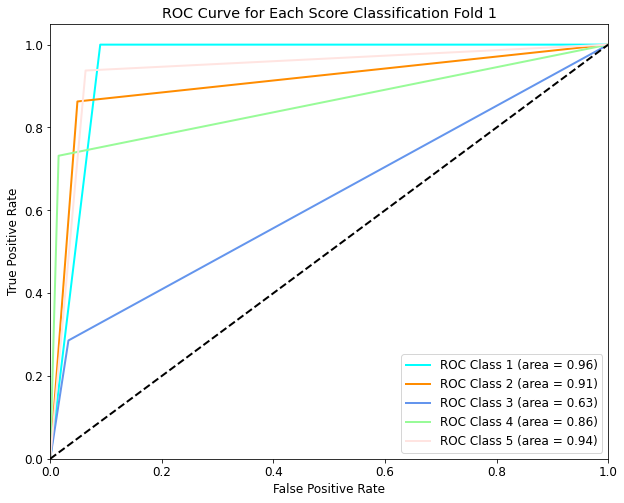

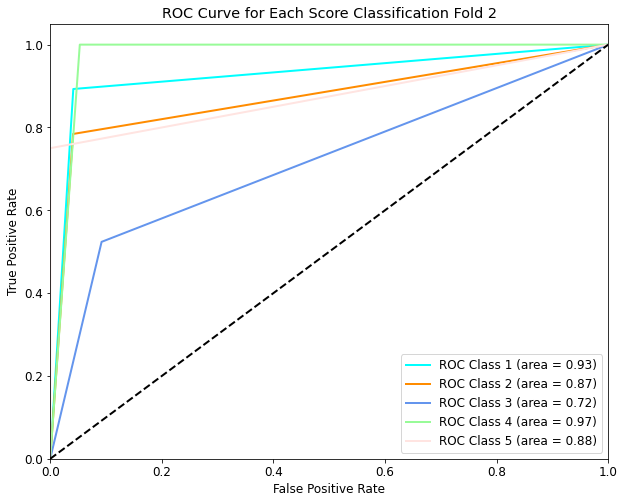

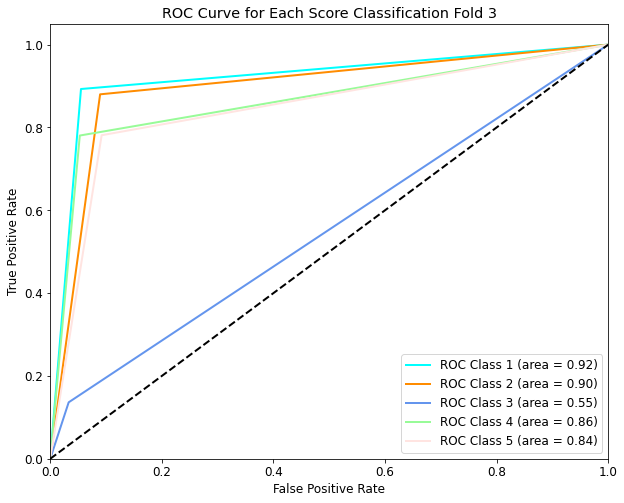

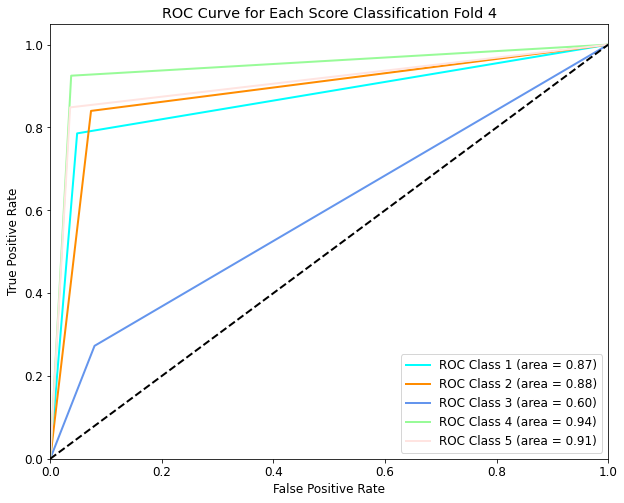

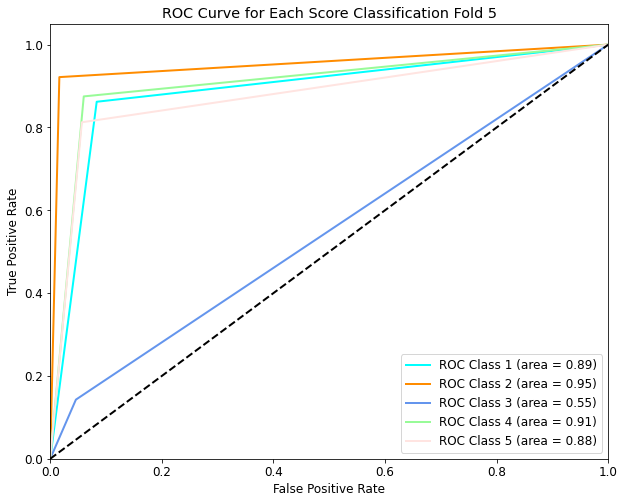

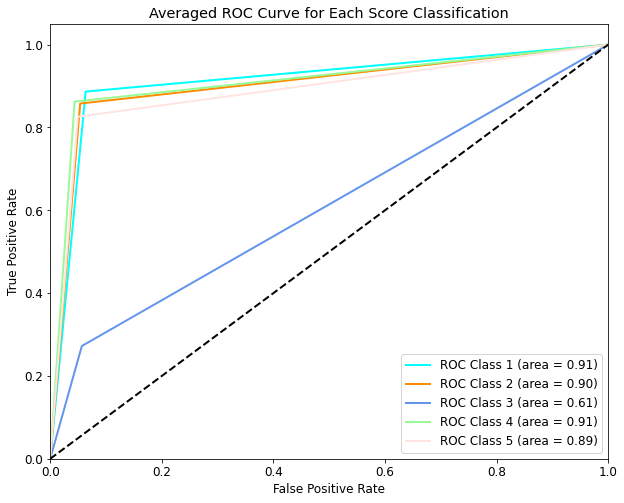

*****Averaged Final Classification Results*****
Accuracy: 0.785(+/- 0.046)
Precision: 0.777(+/- 0.078)
Recall: 0.785(+/- 0.046)
F1: 0.774(+/- 0.062)


In [28]:
yData = death

mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='entropy', maxLevels=None, minSamplesPerLeaf=10, 
                                        modelName='AllData_Death', numFolds=5, 
                                        showIndividualROC=True)

In [29]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

Feature Importance
SVRHemo            0.454312
BPDIAS             0.303226
RAP                0.100961
BPSYS              0.035100
PCWP               0.014429
PAS                0.014330
PPP                0.012389
PAMN               0.010192
PP                 0.006887
PCWPMod            0.006399

## Rehospitalization Label

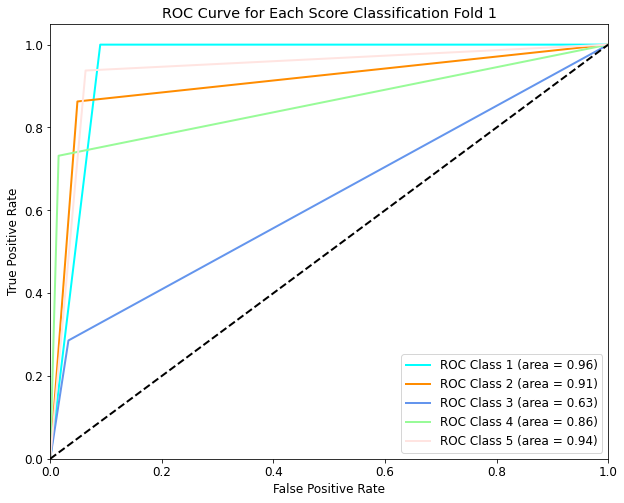

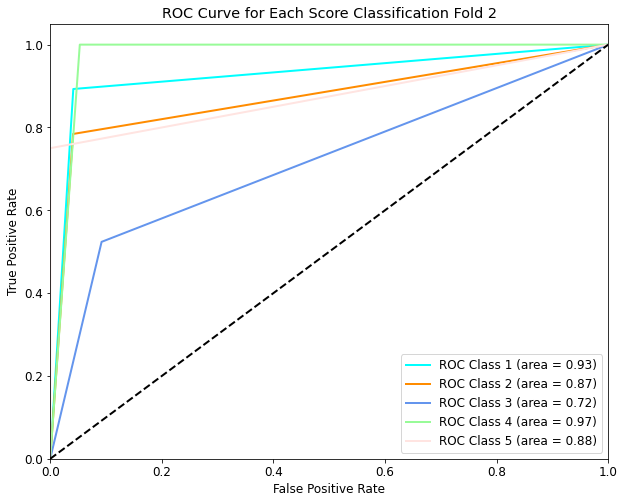

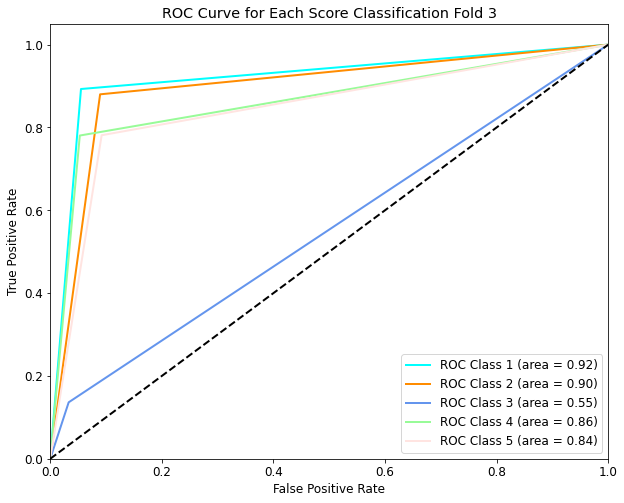

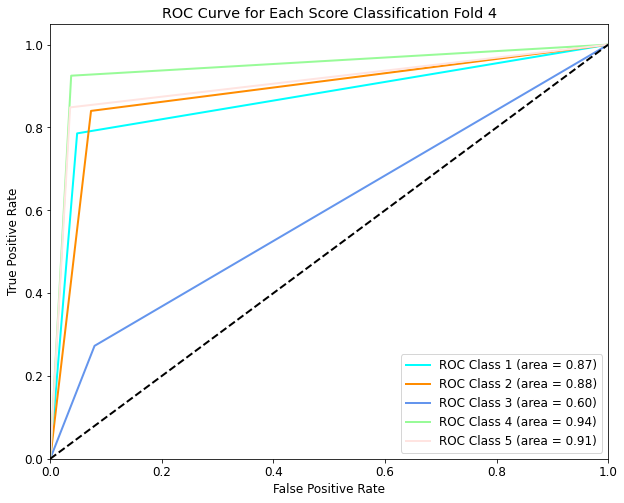

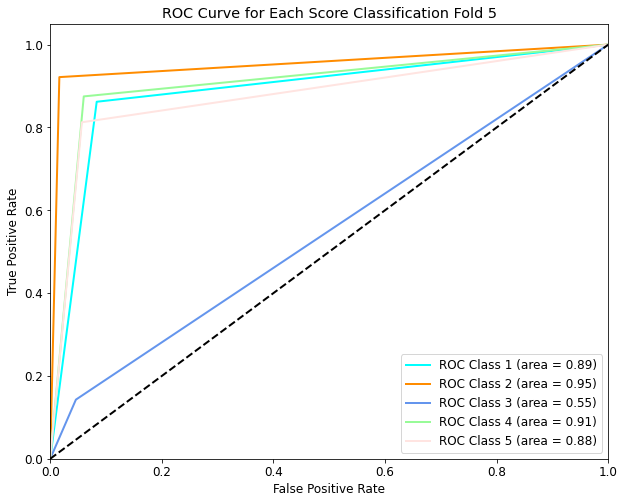

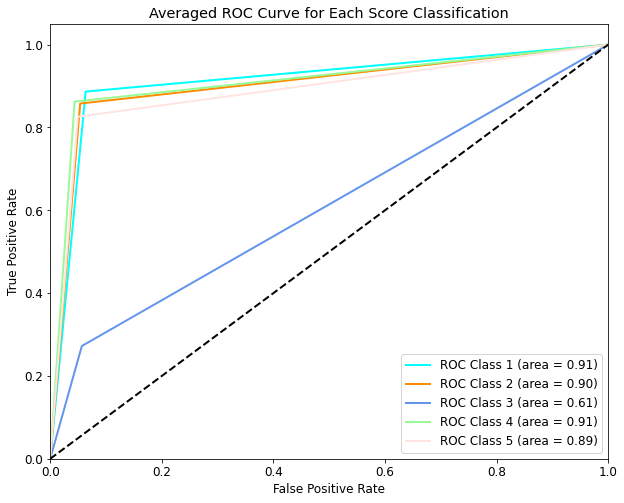

*****Averaged Final Classification Results*****
Accuracy: 0.785(+/- 0.046)
Precision: 0.777(+/- 0.078)
Recall: 0.785(+/- 0.046)
F1: 0.774(+/- 0.062)


In [30]:
yData = rehosp

mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='entropy', maxLevels=None, minSamplesPerLeaf=10, 
                                        modelName='AllData_Rehosp', numFolds=5, 
                                        showIndividualROC=True)

In [31]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

Feature Importance
SVRHemo            0.454312
BPDIAS             0.303226
RAP                0.100961
BPSYS              0.035100
PCWP               0.014429
PAS                0.014330
PPP                0.012389
PAMN               0.010192
PP                 0.006887
PCWPMod            0.006399

## Readmission Label

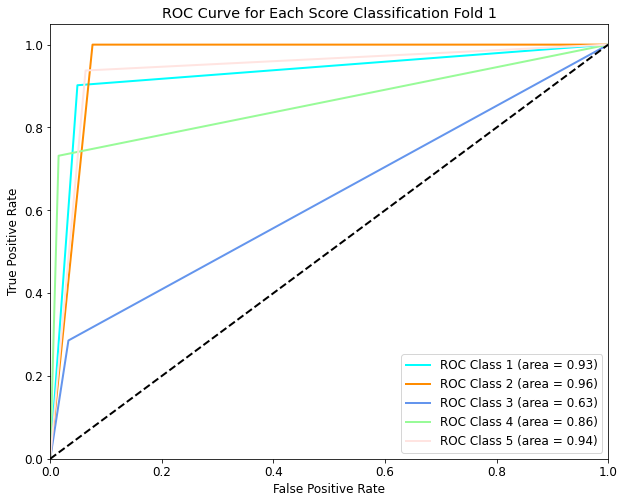

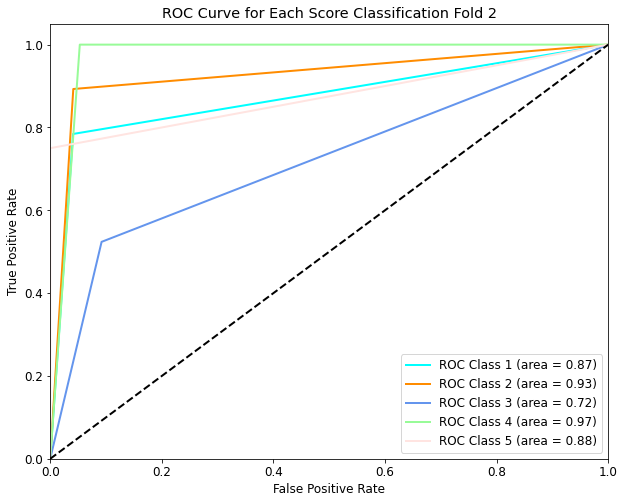

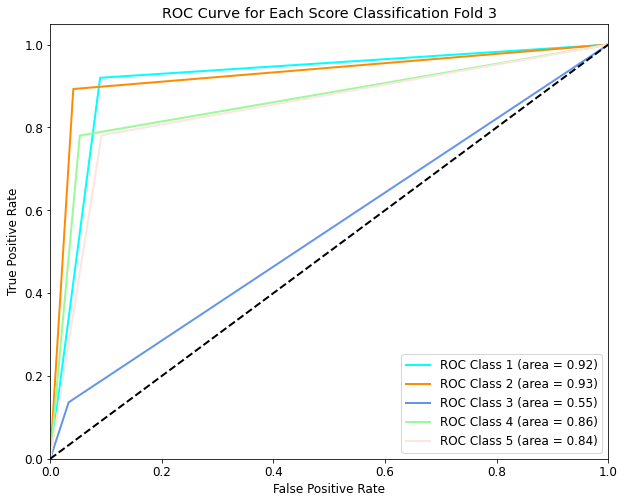

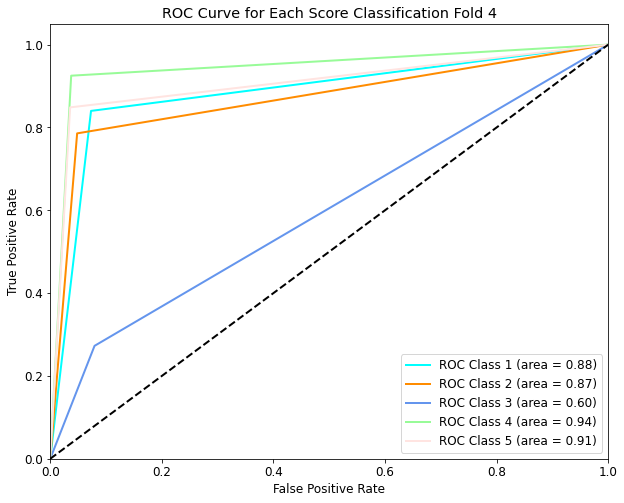

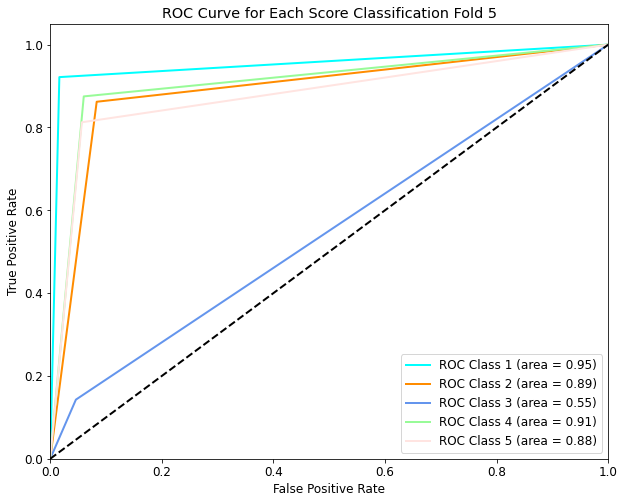

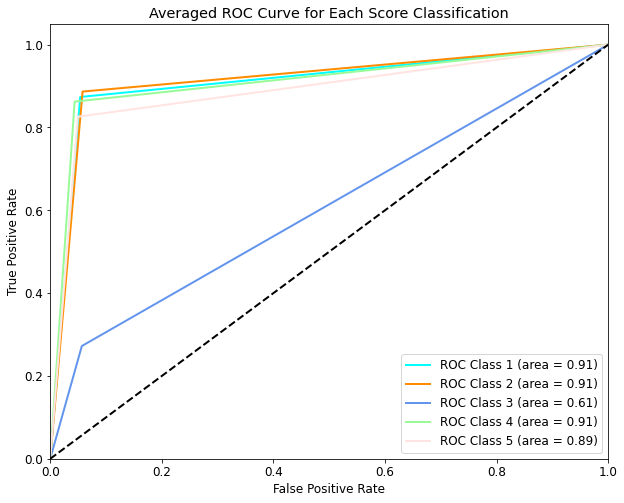

*****Averaged Final Classification Results*****
Accuracy: 0.790(+/- 0.042)
Precision: 0.780(+/- 0.074)
Recall: 0.790(+/- 0.042)
F1: 0.778(+/- 0.057)


In [32]:
yData = readm

mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='entropy', maxLevels=None, minSamplesPerLeaf=10, 
                                        modelName='AllData_Readmission', numFolds=5, 
                                        showIndividualROC=True)

In [33]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

Feature Importance
SVRHemo            0.454312
BPDIAS             0.303226
RAP                0.100961
BPSYS              0.035100
PCWP               0.014429
PAS                0.014330
PPP                0.012389
PAMN               0.010192
PP                 0.006887
PCWPMod            0.006399